In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from json import load
import tifffile
from tqdm import tqdm
from skimage.draw import polygon
from matplotlib import rcParams
import glasbey

palette = {
    "green": "#558150",
    "beige": "#F1E2C3",
    "brown": "#A7785A",
    "pink": "#F0D6C2",
    "black": "#0E0E0E",
}

rcParams['font.family'] = 'sans-serif'
rcParams['figure.facecolor'] = "#FFFFFF00"
rcParams['axes.facecolor'] = "#FFFFFF00"
rcParams['legend.framealpha'] = 0.2
rcParams['axes.edgecolor'] = palette["black"]
rcParams['axes.labelcolor'] = palette["black"]
rcParams['xtick.color'] = palette["black"]
rcParams['ytick.color'] = palette["black"]
rcParams['text.color'] = palette["black"]
rcParams['axes.titlecolor'] = palette["black"]

s_palette = sns.cubehelix_palette(as_cmap=True)
g_palette = glasbey.create_palette()
cpal = sns.cubehelix_palette(start=-0.25, rot=2, as_cmap=True)
blue_palette = sns.cubehelix_palette(as_cmap=True, rot=-.25, light=.7)
blue_root_palette = sns.cubehelix_palette(5, rot=-.25, light=.7)

In [12]:
lightsheet_path = Path(r"D:\Tracking\NucleiTracking\data\interim\lightsheet")
sources = 60, 240, 175
imgs = {}

for source in sources:
    source_path = lightsheet_path / f"raw/Recon_fused_tp_{source}_ch_0.tif"
    imgs[source] = tifffile.imread(source_path)

In [13]:
def rolling_avg(arr, window=5):
    return np.convolve(arr, np.ones(window) / window, mode="same")

(371, 983, 415)


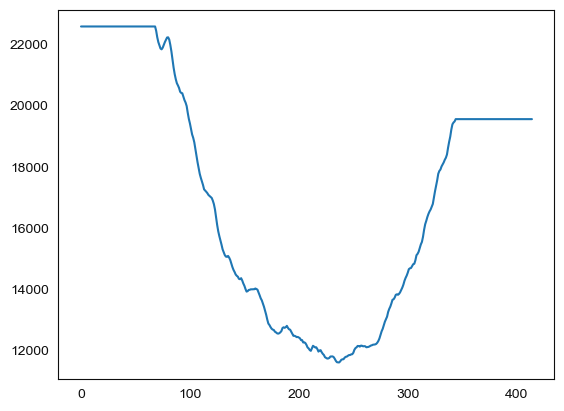

(371, 983, 415)


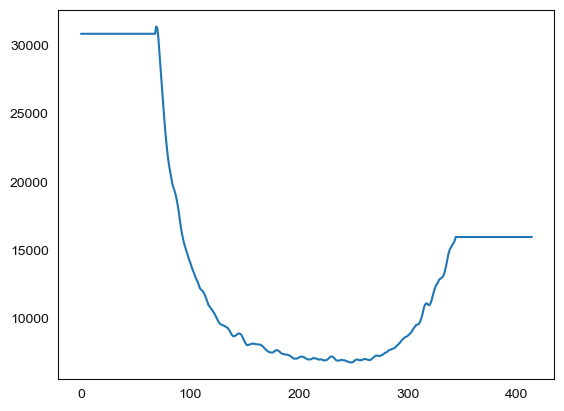

(371, 983, 415)


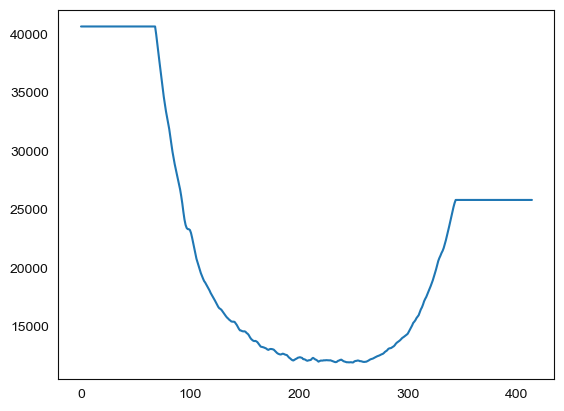

In [14]:
for source in sources:
    print(imgs[source].shape)
    axis_normalizer_max = rolling_avg(np.quantile(imgs[source], 0.99, axis=(0, 1)))
    axis_normalizer_max[:68] = axis_normalizer_max[68]
    axis_normalizer_max[344:] = axis_normalizer_max[344]
    plt.plot(axis_normalizer_max)
    plt.show()
    axis_normalizer_min = rolling_avg(np.quantile(imgs[source], 0.01, axis=(0, 1)))
    axis_normalizer_min[:68] = axis_normalizer_min[68]
    axis_normalizer_min[344:] = axis_normalizer_min[344]
    data = (imgs[source] - axis_normalizer_min) / (axis_normalizer_max - axis_normalizer_min)
    data = np.clip(data, 0, 1, dtype=np.float16)
    tifffile.imwrite(lightsheet_path / f"raw/Recon_fused_tp_{source}_ch_0_normalized.tif", data)